## Import the Data

In [1]:
#Import dataset with key telecom customer data

import pandas as pd

data = pd.read_csv('churn.csv')

## Take a Quick Look at the Data Structure

In [2]:
data.head()

,State,Area_code,Account_length,Total_day_minutes,Total_day_calls,Total_day_charge,Total_eve_minutes,Total_eve_calls,Total_eve_charge,Total_night_minutes,Total_night_calls,Total_night_charge,Total_intl_minutes,Total_intl_calls,Total_intl_charge,International_plan,Voice_mail_plan,Number_vmail_messages,Customer_service_calls,Churn
0,KS,415,128,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,No,Yes,25,1,False
1,OH,415,107,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,No,Yes,26,1,False
2,NJ,415,137,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,No,No,0,0,False
3,OH,408,84,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,Yes,No,0,2,False
4,OK,415,75,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,Yes,No,0,3,False


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Area_code               2666 non-null   int64  
 2   Account_length          2666 non-null   int64  
 3   Total_day_minutes       2666 non-null   float64
 4   Total_day_calls         2666 non-null   int64  
 5   Total_day_charge        2666 non-null   float64
 6   Total_eve_minutes       2666 non-null   float64
 7   Total_eve_calls         2666 non-null   int64  
 8   Total_eve_charge        2666 non-null   float64
 9   Total_night_minutes     2666 non-null   float64
 10  Total_night_calls       2666 non-null   int64  
 11  Total_night_charge      2641 non-null   float64
 12  Total_intl_minutes      2666 non-null   float64
 13  Total_intl_calls        2666 non-null   int64  
 14  Total_intl_charge       2666 non-null   

Note that the "Total night charge" variable is missing values. We will have to impute these later.

In [4]:
data.describe()

,Area_code,Account_length,Total_day_minutes,Total_day_calls,Total_day_charge,Total_eve_minutes,Total_eve_calls,Total_eve_charge,Total_night_minutes,Total_night_calls,Total_night_charge,Total_intl_minutes,Total_intl_calls,Total_intl_charge,Number_vmail_messages,Customer_service_calls
count,2666.000000,2666.000000,2666.00000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2641.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,437.438860,100.620405,179.48162,100.310203,30.512404,200.386159,100.023631,17.033072,201.168942,100.106152,9.050292,10.237022,4.467367,2.764490,8.021755,1.562641
std,42.521018,39.563974,54.21035,19.988162,9.215733,50.951515,20.161445,4.330864,50.780323,19.418459,2.283425,2.788349,2.456195,0.752812,13.612277,1.311236
min,408.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,43.700000,33.000000,1.970000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,408.000000,73.000000,143.40000,87.000000,24.380000,165.300000,87.000000,14.050000,166.925000,87.000000,7.510000,8.500000,3.000000,2.300000,0.000000,1.000000
50%,415.000000,100.000000,179.95000,101.000000,30.590000,200.900000,100.000000,17.080000,201.150000,100.000000,9.050000,10.200000,4.000000,2.750000,0.000000,1.000000
75%,510.000000,127.000000,215.90000,114.000000,36.700000,235.100000,114.000000,19.980000,236.475000,113.000000,10.630000,12.100000,6.000000,3.270000,19.000000,2.000000
max,510.000000,243.000000,350.80000,160.000000,59.640000,363.700000,170.000000,30.910000,395.000000,166.000000,17.770000,20.000000,20.000000,5.400000,50.000000,9.000000


### Create histograms of numberical variables

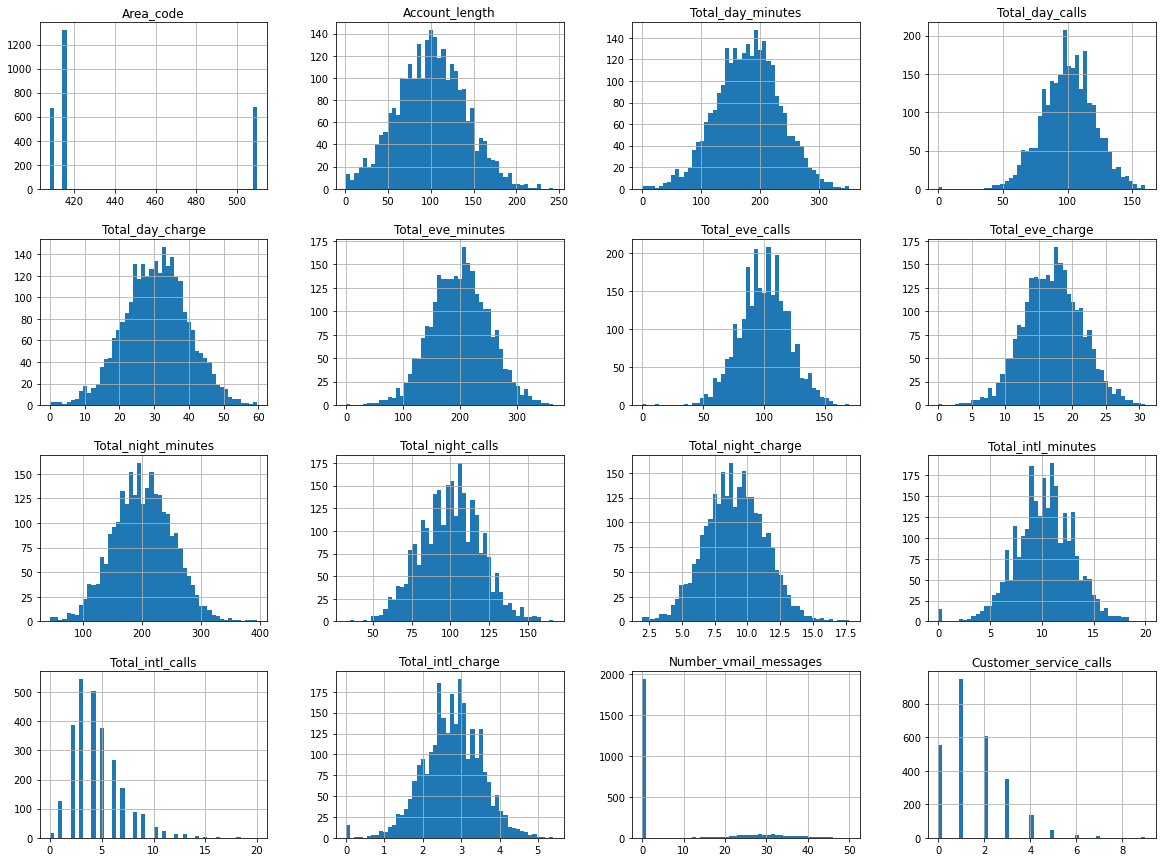

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,15))
plt.show()

## Create a Test Set

In [6]:
import numpy as np

# to make this notebook's output identical at every run
np.random.seed(42)

In [7]:

# For illustration only. Sklearn has train_test_split()
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [8]:
train_set, test_set = split_train_test(data, 0.2)
len(train_set)

2133

In [9]:
len(test_set)

533

In [10]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [11]:
data_with_id = data.reset_index()   # adds an `index` column
train_set, test_set = split_train_test_by_id(data_with_id, 0.2, "index")

In [12]:
test_set.head()

,index,State,Area_code,Account_length,Total_day_minutes,Total_day_calls,Total_day_charge,Total_eve_minutes,Total_eve_calls,Total_eve_charge,...,Total_night_calls,Total_night_charge,Total_intl_minutes,Total_intl_calls,Total_intl_charge,International_plan,Voice_mail_plan,Number_vmail_messages,Customer_service_calls,Churn
2,2,NJ,415,137,243.4,114,41.38,121.2,110,10.30,...,104,7.32,12.2,5,3.29,No,No,0,0,False
5,5,AL,510,118,223.4,98,37.98,220.6,101,18.75,...,118,9.18,6.3,6,1.70,Yes,No,0,0,False
12,12,IA,415,62,120.7,70,20.52,307.2,76,26.11,...,99,9.14,13.1,6,3.54,No,No,0,4,False
16,16,TX,415,73,224.4,90,38.15,159.5,88,13.56,...,74,8.68,13.0,2,3.51,No,No,0,1,False
23,23,MT,408,54,134.3,73,22.83,155.5,100,13.22,...,68,4.59,14.7,4,3.97,No,No,0,3,False


In [13]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

In [14]:
test_set.head()

,State,Area_code,Account_length,Total_day_minutes,Total_day_calls,Total_day_charge,Total_eve_minutes,Total_eve_calls,Total_eve_charge,Total_night_minutes,Total_night_calls,Total_night_charge,Total_intl_minutes,Total_intl_calls,Total_intl_charge,International_plan,Voice_mail_plan,Number_vmail_messages,Customer_service_calls,Churn
2087,OH,510,115,345.3,81,58.70,203.4,106,17.29,217.5,107,9.79,11.8,8,3.19,Yes,No,0,1,True
1915,WY,415,157,180.4,123,30.67,194.0,98,16.49,227.3,88,10.23,8.4,5,2.27,Yes,No,0,0,False
479,AZ,415,84,159.0,80,27.03,167.9,128,14.27,167.6,101,7.54,12.3,5,3.32,No,No,0,1,False
1898,FL,415,105,273.8,97,46.55,289.7,106,24.62,269.1,126,12.11,5.8,3,1.57,No,No,0,2,True
741,KY,510,74,125.8,103,21.39,207.7,96,17.65,207.4,143,9.33,14.1,4,3.81,Yes,No,0,1,True


### Create Histogram of target variable - Body Mass Index (BMI)

In [15]:
## Convert categorical target variable, Churn, into a numerical binary varible

churn_mapper = {True:1, False:0}

data["Churn"] = data["Churn"].replace(churn_mapper)

In [16]:
data["Churn"].value_counts()

0    2278
1     388
Name: Churn, dtype: int64

In [17]:
data.head()

,State,Area_code,Account_length,Total_day_minutes,Total_day_calls,Total_day_charge,Total_eve_minutes,Total_eve_calls,Total_eve_charge,Total_night_minutes,Total_night_calls,Total_night_charge,Total_intl_minutes,Total_intl_calls,Total_intl_charge,International_plan,Voice_mail_plan,Number_vmail_messages,Customer_service_calls,Churn
0,KS,415,128,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,No,Yes,25,1,0
1,OH,415,107,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,No,Yes,26,1,0
2,NJ,415,137,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,No,No,0,0,0
3,OH,408,84,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,Yes,No,0,2,0
4,OK,415,75,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,Yes,No,0,3,0


<AxesSubplot:>

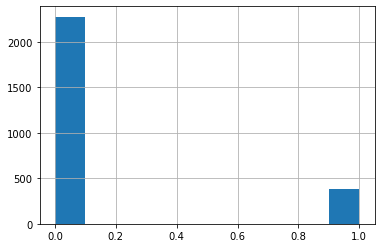

In [18]:
data["Churn"].hist()

### Exploring the U.S. state the customers come from

,Overall,Stratified,Random,Rand. %error,Strat. %error
AK,0.016129,0.016854,0.016854,4.494382,4.494382
AL,0.024756,0.024345,0.026217,5.901714,-1.662694
AR,0.017629,0.016854,0.009363,-46.888198,-4.398757
AZ,0.016879,0.016854,0.022472,33.133583,-0.149813
CA,0.009002,0.009363,0.013109,45.614856,4.010612
CO,0.022131,0.022472,0.028090,26.928204,1.542563
CT,0.022131,0.022472,0.018727,-15.381197,1.542563
DC,0.016879,0.016854,0.026217,55.322514,-0.149813
DE,0.019130,0.018727,0.011236,-41.264596,-2.107660
FL,0.020255,0.020599,0.024345,20.190040,1.699265


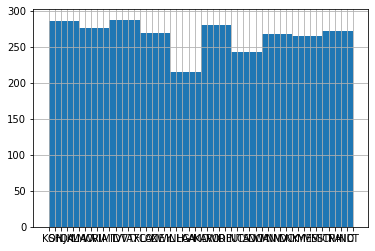

In [19]:
data["State"].hist()


from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data["State"]):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

strat_test_set["State"].value_counts() / len(strat_test_set)

data["State"].value_counts() / len(data)

def state_proportions(data):
    return data["State"].value_counts() / len(data)

train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": state_proportions(data),
    "Stratified": state_proportions(strat_test_set),
    "Random": state_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

compare_props

# Discover and Visualize the Data to Gain Insights

In [20]:
data = strat_train_set.copy()

<AxesSubplot:xlabel='Total_intl_calls', ylabel='Total_night_calls'>

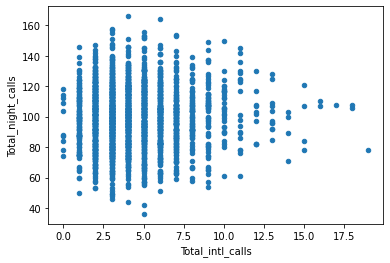

In [21]:
data.plot(kind="scatter", x="Total_intl_calls", y="Total_night_calls")

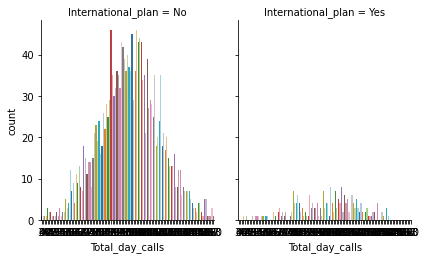

In [22]:
import seaborn as sns

# Plot
calls_by_plan_type = sns.catplot(x="Total_day_calls", col="International_plan", col_wrap=4,
                        data=data[data.Total_day_calls.notnull()],
                        kind="count", height=3.5, aspect=.8, 
                        palette='tab20')

## Looking for Correlations

In [23]:
corr_matrix = data.corr()

In [24]:
corr_matrix["Churn"].sort_values(ascending=False)

Churn                     1.000000
Customer_service_calls    0.192191
Total_day_charge          0.182078
Total_day_minutes         0.182077
Total_intl_minutes        0.085530
Total_intl_charge         0.085526
Total_eve_minutes         0.073304
Total_eve_charge          0.073283
Total_night_charge        0.036185
Total_night_minutes       0.034948
Total_night_calls         0.019572
Account_length            0.016928
Area_code                 0.015960
Total_day_calls           0.013001
Total_eve_calls          -0.014594
Total_intl_calls         -0.093527
Number_vmail_messages    -0.094235
Name: Churn, dtype: float64

In [25]:
corr_matrix

,Area_code,Account_length,Total_day_minutes,Total_day_calls,Total_day_charge,Total_eve_minutes,Total_eve_calls,Total_eve_charge,Total_night_minutes,Total_night_calls,Total_night_charge,Total_intl_minutes,Total_intl_calls,Total_intl_charge,Number_vmail_messages,Customer_service_calls,Churn
Area_code,1.000000,-0.014936,-0.016405,-0.015130,-0.016400,0.006244,-0.009776,0.006274,0.004190,0.021105,0.005110,-0.022624,-0.035026,-0.022752,-0.010472,0.039723,0.015960
Account_length,-0.014936,1.000000,0.010797,0.042693,0.010795,-0.021568,0.010514,-0.021556,-0.016628,-0.026586,-0.016439,0.023125,0.021933,0.023128,-0.004485,0.003026,0.016928
Total_day_minutes,-0.016405,0.010797,1.000000,0.006302,1.000000,0.011228,-0.010007,0.011221,0.002944,-0.001205,0.002909,-0.020032,-0.001589,-0.019950,0.020049,-0.034653,0.182077
Total_day_calls,-0.015130,0.042693,0.006302,1.000000,0.006311,-0.028182,0.015743,-0.028190,0.015791,-0.014636,0.019464,0.041783,-0.009280,0.041835,-0.004241,-0.016084,0.013001
Total_day_charge,-0.016400,0.010795,1.000000,0.006311,1.000000,0.011239,-0.010005,0.011232,0.002949,-0.001202,0.002912,-0.020040,-0.001585,-0.019958,0.020045,-0.034662,0.182078
Total_eve_minutes,0.006244,-0.021568,0.011228,-0.028182,0.011239,1.000000,-0.011609,1.000000,-0.007775,0.026224,-0.007380,-0.005790,0.011833,-0.005939,0.012179,0.001567,0.073304
Total_eve_calls,-0.009776,0.010514,-0.010007,0.015743,-0.010005,-0.011609,1.000000,-0.011597,-0.002882,-0.002000,-0.002100,0.035955,0.025609,0.035969,0.011075,-0.024341,-0.014594
Total_eve_charge,0.006274,-0.021556,0.011221,-0.028190,0.011232,1.000000,-0.011597,1.000000,-0.007786,0.026237,-0.007394,-0.005811,0.011845,-0.005960,0.012199,0.001564,0.073283
Total_night_minutes,0.004190,-0.016628,0.002944,0.015791,0.002949,-0.007775,-0.002882,-0.007786,1.000000,0.013854,0.999999,0.009253,-0.003215,0.009380,0.005224,0.000274,0.034948
Total_night_calls,0.021105,-0.026586,-0.001205,-0.014636,-0.001202,0.026224,-0.002000,0.026237,0.013854,1.000000,0.014851,-0.025515,0.026697,-0.025503,0.014845,-0.000099,0.019572


<AxesSubplot:>

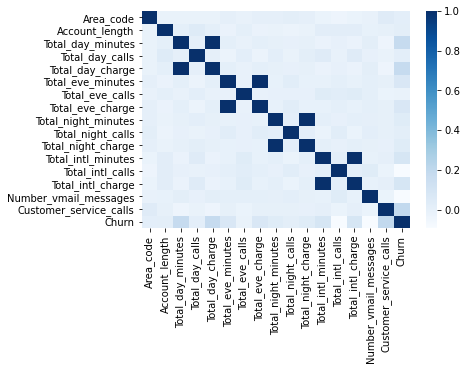

In [26]:
sns.heatmap(corr_matrix, cmap = 'Blues')

Note that there is very high correlation between the minutes and charge variables. This is becuase charge is a factor of minutes since the customers are charged a rate per minute. Therefore we need to remove one of the varibales for each pair of correlated variables before we use these variables as predictors in a model.

array([[<AxesSubplot:xlabel='Churn', ylabel='Churn'>,
        <AxesSubplot:xlabel='Total_eve_calls', ylabel='Churn'>,
        <AxesSubplot:xlabel='Total_night_calls', ylabel='Churn'>,
        <AxesSubplot:xlabel='Total_intl_minutes', ylabel='Churn'>,
        <AxesSubplot:xlabel='Total_day_minutes', ylabel='Churn'>,
        <AxesSubplot:xlabel='Total_intl_calls', ylabel='Churn'>],
       [<AxesSubplot:xlabel='Churn', ylabel='Total_eve_calls'>,
        <AxesSubplot:xlabel='Total_eve_calls', ylabel='Total_eve_calls'>,
        <AxesSubplot:xlabel='Total_night_calls', ylabel='Total_eve_calls'>,
        <AxesSubplot:xlabel='Total_intl_minutes', ylabel='Total_eve_calls'>,
        <AxesSubplot:xlabel='Total_day_minutes', ylabel='Total_eve_calls'>,
        <AxesSubplot:xlabel='Total_intl_calls', ylabel='Total_eve_calls'>],
       [<AxesSubplot:xlabel='Churn', ylabel='Total_night_calls'>,
        <AxesSubplot:xlabel='Total_eve_calls', ylabel='Total_night_calls'>,
        <AxesSubplot:xlabel='Tot

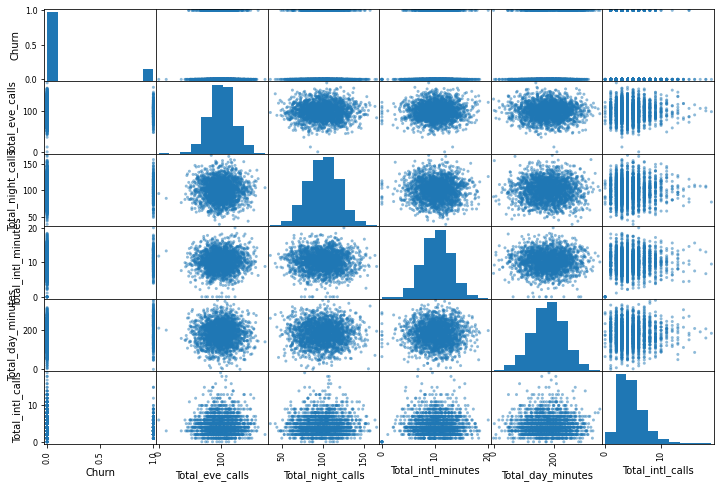

In [27]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

attributes = ["Churn", "Total_eve_calls", "Total_night_calls",
              "Total_intl_minutes", "Total_day_minutes", "Total_intl_calls"]
scatter_matrix(data[attributes], figsize=(12, 8))


## Experimenting with Attribute Combinations

In [28]:
data["Total_calls"] = data["Total_day_calls"]+data["Total_eve_calls"]+data['Total_night_calls']+data['Total_intl_calls']
data["Total_mins"] = data["Total_day_minutes"]+data["Total_eve_minutes"]+data['Total_night_minutes']+data['Total_intl_minutes']
data["Total_charges"] = data["Total_day_charge"]+data["Total_eve_charge"]+data['Total_night_charge']+data['Total_intl_charge']





In [29]:
corr_matrix = data.corr()
corr_matrix["Churn"].sort_values(ascending=False)

Churn                     1.000000
Total_charges             0.205578
Customer_service_calls    0.192191
Total_day_charge          0.182078
Total_day_minutes         0.182077
Total_mins                0.172679
Total_intl_minutes        0.085530
Total_intl_charge         0.085526
Total_eve_minutes         0.073304
Total_eve_charge          0.073283
Total_night_charge        0.036185
Total_night_minutes       0.034948
Total_night_calls         0.019572
Account_length            0.016928
Area_code                 0.015960
Total_day_calls           0.013001
Total_calls               0.003396
Total_eve_calls          -0.014594
Total_intl_calls         -0.093527
Number_vmail_messages    -0.094235
Name: Churn, dtype: float64

In [30]:
# Drop the three attributes we added by combining existing attributes because we will add them in later in script
# using the custom transformer function:

data = data.drop(columns=['Total_calls', 'Total_mins', 'Total_charges'])



# Prepare the Data for Machine Learning Algorithms

In [31]:
data = strat_train_set.drop("Churn", axis=1) # drop labels for training set
data_labels = strat_train_set["Churn"].copy()

## Data Cleaning

In [32]:
sample_incomplete_rows = data[data.isnull().any(axis=1)].head()
sample_incomplete_rows

,State,Area_code,Account_length,Total_day_minutes,Total_day_calls,Total_day_charge,Total_eve_minutes,Total_eve_calls,Total_eve_charge,Total_night_minutes,Total_night_calls,Total_night_charge,Total_intl_minutes,Total_intl_calls,Total_intl_charge,International_plan,Voice_mail_plan,Number_vmail_messages,Customer_service_calls
285,AK,510,59,182.5,104,31.03,204.7,95,17.40,229.9,100,NaN,11.3,8,3.05,No,No,0,4
90,MA,415,103,185.0,117,31.45,223.3,94,18.98,222.8,91,NaN,12.6,2,3.40,No,No,0,2
324,DC,415,66,167.3,91,28.44,230.0,68,19.55,191.7,118,NaN,10.6,5,2.86,No,No,0,1
46,IN,408,81,175.5,67,29.84,249.3,85,21.19,270.2,98,NaN,10.2,3,2.75,No,No,0,1
384,GA,510,141,149.7,112,25.45,162.5,118,13.81,220.3,115,NaN,7.6,2,2.05,No,Yes,23,3


We need to impute the missing values for the Total_night_charge variable. We can do this using the median value from this column.

In [33]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

Remove the text attribute because median can only be calculated on numerical attributes:

In [34]:
data_num = data.select_dtypes(include=[np.number])

In [35]:
imputer.fit(data_num)

SimpleImputer(strategy='median')

In [36]:
imputer.statistics_

array([415.   , 100.   , 181.45 , 101.   ,  30.85 , 201.35 , 100.   ,
        17.115, 198.8  , 100.   ,   8.94 ,  10.3  ,   4.   ,   2.78 ,
         0.   ,   1.   ])

Check that this is the same as manually computing the median of each attribute:

In [37]:
data_num.median().values

array([415.   , 100.   , 181.45 , 101.   ,  30.85 , 201.35 , 100.   ,
        17.115, 198.8  , 100.   ,   8.94 ,  10.3  ,   4.   ,   2.78 ,
         0.   ,   1.   ])

Transform the training set:

In [38]:
X = imputer.transform(data_num)

In [39]:
data_tr = pd.DataFrame(X, columns=data_num.columns,
                          index=data.index)

In [40]:
data_tr.loc[sample_incomplete_rows.index.values]

,Area_code,Account_length,Total_day_minutes,Total_day_calls,Total_day_charge,Total_eve_minutes,Total_eve_calls,Total_eve_charge,Total_night_minutes,Total_night_calls,Total_night_charge,Total_intl_minutes,Total_intl_calls,Total_intl_charge,Number_vmail_messages,Customer_service_calls
285,510.0,59.0,182.5,104.0,31.03,204.7,95.0,17.40,229.9,100.0,8.94,11.3,8.0,3.05,0.0,4.0
90,415.0,103.0,185.0,117.0,31.45,223.3,94.0,18.98,222.8,91.0,8.94,12.6,2.0,3.40,0.0,2.0
324,415.0,66.0,167.3,91.0,28.44,230.0,68.0,19.55,191.7,118.0,8.94,10.6,5.0,2.86,0.0,1.0
46,408.0,81.0,175.5,67.0,29.84,249.3,85.0,21.19,270.2,98.0,8.94,10.2,3.0,2.75,0.0,1.0
384,510.0,141.0,149.7,112.0,25.45,162.5,118.0,13.81,220.3,115.0,8.94,7.6,2.0,2.05,23.0,3.0


In [41]:
imputer.strategy

'median'

In [42]:
data_tr = pd.DataFrame(X, columns=data_num.columns,
                          index=data_num.index)

In [43]:
data_tr.head()

,Area_code,Account_length,Total_day_minutes,Total_day_calls,Total_day_charge,Total_eve_minutes,Total_eve_calls,Total_eve_charge,Total_night_minutes,Total_night_calls,Total_night_charge,Total_intl_minutes,Total_intl_calls,Total_intl_charge,Number_vmail_messages,Customer_service_calls
1740,415.0,156.0,174.5,65.0,29.67,197.4,116.0,16.78,238.5,86.0,10.73,10.6,2.0,2.86,0.0,0.0
461,415.0,92.0,201.9,74.0,34.32,226.8,119.0,19.28,217.5,80.0,9.79,13.7,6.0,3.70,0.0,3.0
1046,408.0,185.0,151.1,121.0,25.69,244.7,88.0,20.80,154.4,91.0,6.95,13.8,2.0,3.73,29.0,2.0
1638,415.0,97.0,215.3,58.0,36.60,242.4,91.0,20.60,279.8,105.0,12.59,12.1,9.0,3.27,0.0,0.0
414,510.0,148.0,93.6,137.0,15.91,193.8,72.0,16.47,144.9,84.0,6.52,17.5,5.0,4.73,14.0,1.0


## Handling Text and Categorical Attributes

Now let's preprocess the categorical input feature, `State, Area_code, International_plan, and Voice_mail_plan`:

In [44]:
data_cat = data[["State", "Area_code", "International_plan", "Voice_mail_plan"]]
data_cat.head(10)

,State,Area_code,International_plan,Voice_mail_plan
1740,IL,415,No,No
461,FL,415,No,No
1046,MT,408,No,Yes
1638,CT,415,No,No
414,ID,510,No,Yes
1873,UT,415,No,No
835,AK,408,No,No
1650,AK,510,No,No
1218,AR,415,No,No
734,NC,415,No,No


In [45]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
data_cat_encoded = ordinal_encoder.fit_transform(data_cat)
data_cat_encoded[:10]

array([[14.,  1.,  0.,  0.],
       [ 9.,  1.,  0.,  0.],
       [26.,  0.,  0.,  1.],
       [ 6.,  1.,  0.,  0.],
       [13.,  2.,  0.,  1.],
       [44.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  2.,  0.,  0.],
       [ 2.,  1.,  0.,  0.],
       [27.,  1.,  0.,  0.]])

In [46]:
ordinal_encoder.categories_

[array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
        'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
        'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
        'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
        'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'], dtype=object),
 array([408, 415, 510]),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object)]

In [47]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder(sparse=False)
data_cat_1hot = cat_encoder.fit_transform(data_cat)
data_cat_1hot

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 1., 0.]])

In [48]:
cat_encoder.categories_

[array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
        'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
        'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
        'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
        'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'], dtype=object),
 array([408, 415, 510]),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object)]

## Custom Transformers


Let's create a custom transformer to add extra attributes:

In [49]:
col_names = "Total_day_calls", "Total_eve_calls", "Total_night_calls", "Total_intl_calls", "Total_day_minutes", "Total_eve_minutes", "Total_night_minutes", "Total_intl_minutes", "Total_day_charge", "Total_eve_charge", "Total_night_charge", "Total_intl_charge"
Total_day_calls_ix, Total_eve_calls_ix, Total_night_calls_ix, Total_intl_calls_ix, Total_day_minutes_ix, Total_eve_minutes_ix,Total_night_minutes_ix, Total_intl_minutes_ix, Total_day_charge_ix, Total_eve_charge_ix, Total_night_charge_ix, Total_intl_charge_ix = [
    data.columns.get_loc(c) for c in col_names] # get the column indices

In [50]:
from sklearn.base import BaseEstimator, TransformerMixin

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_Total_calls=True): # no *args or **kargs
        self.add_Total_calls = add_Total_calls
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        Total_mins = X[:, Total_day_minutes_ix] + X[:, Total_eve_minutes_ix] + X[:, Total_night_minutes_ix] + X[:, Total_intl_minutes_ix]
        Total_charges = X[:, Total_day_charge_ix] + X[:, Total_eve_charge_ix] + X[:, Total_night_charge_ix] + X[:, Total_intl_charge_ix]
        if self.add_Total_calls:
            Total_calls = X[:, Total_day_calls_ix] + X[:, Total_eve_calls_ix] + X[:, Total_night_calls_ix] + X[:, Total_intl_calls_ix]
            return np.c_[X, Total_calls, Total_mins,
                         Total_charges]
        else:
            return np.c_[X, Total_mins, Total_charges]

attr_adder = CombinedAttributesAdder(add_Total_calls=True)
data_extra_attribs = attr_adder.transform(data.values)

In [51]:
len(data_extra_attribs[0])

22

Also, `data_extra_attribs` is a NumPy array, we've lost the column names (unfortunately, that's a problem with Scikit-Learn). To recover a `DataFrame`, you can run this:

In [52]:
data_extra_attribs = pd.DataFrame(
    data_extra_attribs,
    columns=list(data.columns)+["Total_calls","Total_mins","Total_charges"],
    index=data.index)
data_extra_attribs.head()

,State,Area_code,Account_length,Total_day_minutes,Total_day_calls,Total_day_charge,Total_eve_minutes,Total_eve_calls,Total_eve_charge,Total_night_minutes,...,Total_intl_minutes,Total_intl_calls,Total_intl_charge,International_plan,Voice_mail_plan,Number_vmail_messages,Customer_service_calls,Total_calls,Total_mins,Total_charges
1740,IL,415,156,174.5,65,29.67,197.4,116,16.78,238.5,...,10.6,2,2.86,No,No,0,0,269,621.0,60.04
461,FL,415,92,201.9,74,34.32,226.8,119,19.28,217.5,...,13.7,6,3.7,No,No,0,3,279,659.9,67.09
1046,MT,408,185,151.1,121,25.69,244.7,88,20.8,154.4,...,13.8,2,3.73,No,Yes,29,2,302,564.0,57.17
1638,CT,415,97,215.3,58,36.6,242.4,91,20.6,279.8,...,12.1,9,3.27,No,No,0,0,263,749.6,73.06
414,ID,510,148,93.6,137,15.91,193.8,72,16.47,144.9,...,17.5,5,4.73,No,Yes,14,1,298,449.8,43.63


## Transformation Pipelines


Now let's build a pipeline for preprocessing the numerical attributes:

In [63]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

data_num_tr = num_pipeline.fit_transform(data_num)

In [54]:
data_num_tr

array([[-0.52883554,  1.40027483, -0.10339326, ...,  0.05004678,
        -1.03969371,  0.35936654],
       [-0.52883554, -0.21064452,  0.402474  , ...,  0.72228369,
        -0.74954789,  0.51595719],
       [-0.69356819,  2.13022266, -0.53541128, ..., -0.22361563,
        -0.08221252,  0.29673028],
       ...,
       [ 1.70682194,  1.37510422,  0.08307606, ...,  0.0786526 ,
         1.07837074,  0.13877797],
       [-0.52883554, -1.82156387, -0.37663542, ..., -0.20359155,
         0.70118118,  0.17145776],
       [-0.69356819, -0.38683882, -0.27140027, ...,  0.33991915,
         1.31048739,  1.83404198]])

In [72]:
from sklearn.compose import ColumnTransformer

num_attribs = list(data_num)
cat_attribs = ["State", "Area_code", "International_plan", "Voice_mail_plan"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

data_prepared = full_pipeline.fit_transform(data)

In [73]:
data_prepared = data_prepared.toarray()
data_prepared

array([[-0.52883554,  1.40027483, -0.10339326, ...,  0.        ,
         1.        ,  0.        ],
       [-0.52883554, -0.21064452,  0.402474  , ...,  0.        ,
         1.        ,  0.        ],
       [-0.69356819,  2.13022266, -0.53541128, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.70682194,  1.37510422,  0.08307606, ...,  0.        ,
         1.        ,  0.        ],
       [-0.52883554, -1.82156387, -0.37663542, ...,  0.        ,
         1.        ,  0.        ],
       [-0.69356819, -0.38683882, -0.27140027, ...,  1.        ,
         1.        ,  0.        ]])

In [74]:
data_prepared.shape

(2132, 77)

In [58]:
from sklearn.base import BaseEstimator, TransformerMixin

# Create a class to select numerical or categorical columns 
class OldDataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

Now let's join all these components into a big pipeline that will preprocess both the numerical and the categorical features:

In [59]:
num_attribs = list(data_num)
cat_attribs = ["State", "Area_code", "International_plan", "Voice_mail_plan"]

old_num_pipeline = Pipeline([
        ('selector', OldDataFrameSelector(num_attribs)),
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

old_cat_pipeline = Pipeline([
        ('selector', OldDataFrameSelector(cat_attribs)),
        ('cat_encoder', OneHotEncoder(sparse=False)),
    ])

In [60]:
from sklearn.pipeline import FeatureUnion

old_full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", old_num_pipeline),
        ("cat_pipeline", old_cat_pipeline),
    ])

In [61]:
old_data_prepared = old_full_pipeline.fit_transform(data)
old_data_prepared

array([[-0.52883554,  1.40027483, -0.10339326, ...,  0.        ,
         1.        ,  0.        ],
       [-0.52883554, -0.21064452,  0.402474  , ...,  0.        ,
         1.        ,  0.        ],
       [-0.69356819,  2.13022266, -0.53541128, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.70682194,  1.37510422,  0.08307606, ...,  0.        ,
         1.        ,  0.        ],
       [-0.52883554, -1.82156387, -0.37663542, ...,  0.        ,
         1.        ,  0.        ],
       [-0.69356819, -0.38683882, -0.27140027, ...,  1.        ,
         1.        ,  0.        ]])

The result is the same as with the `ColumnTransformer`:

In [75]:
np.allclose(data_prepared, old_data_prepared)

True

# Select and Train a Model

## Training and Evaluating on the Training Set


In [81]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(data_prepared, data_labels)

LogisticRegression()

In [86]:
# let's try the full preprocessing pipeline on a few training instances
some_data = data.iloc[:5]
some_labels = data_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [-0.03710938  0.26171875  0.203125    0.16992188 -0.07617188]


Compare against the actual values:

In [87]:
print("Labels:", list(some_labels))

Labels: [0, 0, 0, 0, 0]


In [88]:
some_data_prepared = some_data_prepared.toarray()
some_data_prepared

array([[-0.52883554,  1.40027483, -0.10339326, -1.77394098, -0.10290481,
        -0.07550239,  0.81457815, -0.07534467,  0.74674478, -0.72524845,
         0.75086954,  0.11888339, -0.99809722,  0.11551726, -0.59547008,
        -1.18494456,  0.05004678, -1.03969371,  0.35936654,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0. 

In [97]:
from sklearn.metrics import mean_squared_error

data_predictions = log_reg.predict(data_prepared)
log_mse = mean_squared_error(data_labels, data_predictions)
log_rmse = np.sqrt(log_mse)
log_rmse

0.36304424758363096

**Note**: since Scikit-Learn 0.22, you can get the RMSE directly by calling the `mean_squared_error()` function with `squared=False`.

In [98]:
from sklearn.metrics import mean_absolute_error

log_mae = mean_absolute_error(data_labels, data_predictions)
log_mae

0.13180112570356473

In [99]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(data_prepared, data_labels)

DecisionTreeRegressor(random_state=42)

In [100]:
data_predictions = tree_reg.predict(data_prepared)
tree_mse = mean_squared_error(data_labels, data_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

## Better Evaluation Using Cross-Validation

In [101]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, data_prepared, data_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [102]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [0.20507578 0.13671719 0.27407548 0.19380063 0.22725139 0.18128389
 0.19380063 0.2470483  0.20555661 0.22725139]
Mean: 0.2091861294498439
Standard deviation: 0.03581990719094738


In [103]:
log_scores = cross_val_score(log_reg, data_prepared, data_labels,
                             scoring="neg_mean_squared_error", cv=10)
log_rmse_scores = np.sqrt(-log_scores)
display_scores(log_rmse_scores)

Scores: [0.39859567 0.3866946  0.37529331 0.38149693 0.37529331 0.39953024
 0.3560345  0.33567254 0.36256779 0.37529331]
Mean: 0.37464721937029394
Standard deviation: 0.018431967963606497


In [104]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(data_prepared, data_labels)

RandomForestRegressor(random_state=42)

In [105]:
data_predictions = forest_reg.predict(data_prepared)
forest_mse = mean_squared_error(data_labels, data_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.060719575029349805

In [106]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, data_prepared, data_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [0.14664312 0.13222043 0.19027655 0.16582275 0.19899985 0.15372526
 0.1400704  0.17754058 0.146744   0.18574934]
Mean: 0.16377922830497763
Standard deviation: 0.022049556561511315


In [107]:
scores = cross_val_score(log_reg, data_prepared, data_labels, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count    10.000000
mean      0.374647
std       0.019429
min       0.335673
25%       0.365749
50%       0.375293
75%       0.385395
max       0.399530
dtype: float64

In [108]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(data_prepared, data_labels)
data_predictions = svm_reg.predict(data_prepared)
svm_mse = mean_squared_error(data_labels, data_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

0.3561164795872682

# Fine-Tune The Model

## Grid Search

In [109]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(data_prepared, data_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

The best hyperparameter combination found:

In [110]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [111]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

Let's look at the score of each hyperparameter combination tested during the grid search:

In [112]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.3254241193926449 {'max_features': 2, 'n_estimators': 3}
0.2789676873950611 {'max_features': 2, 'n_estimators': 10}
0.2717380861650048 {'max_features': 2, 'n_estimators': 30}
0.30165017832434554 {'max_features': 4, 'n_estimators': 3}
0.2571242597656499 {'max_features': 4, 'n_estimators': 10}
0.2450167885727412 {'max_features': 4, 'n_estimators': 30}
0.2674079317050504 {'max_features': 6, 'n_estimators': 3}
0.23806708170972204 {'max_features': 6, 'n_estimators': 10}
0.22930541776230856 {'max_features': 6, 'n_estimators': 30}
0.2789341997297741 {'max_features': 8, 'n_estimators': 3}
0.2329999330158486 {'max_features': 8, 'n_estimators': 10}
0.22250165680026845 {'max_features': 8, 'n_estimators': 30}
0.3072162665269816 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
0.2723297534772432 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
0.2767921660973105 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
0.2539397216639963 {'bootstrap': False, 'max_features': 3

In [113]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.012621,0.001886,0.001897,0.000321,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-0.111892,-0.097060,...,-0.105901,0.013360,18,-0.029326,-0.026979,-0.026182,-0.028722,-0.032890,-0.028820,0.002332
1,0.026917,0.000815,0.002633,0.000157,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-0.073911,-0.073162,...,-0.077823,0.003852,14,-0.013085,-0.014475,-0.013306,-0.014203,-0.015434,-0.014101,0.000847
2,0.086634,0.007882,0.006813,0.001681,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-0.069846,-0.068683,...,-0.073842,0.003829,10,-0.010948,-0.011299,-0.010920,-0.011441,-0.011532,-0.011228,0.000252
3,0.014437,0.000815,0.002055,0.000534,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-0.093937,-0.091335,...,-0.090993,0.007306,16,-0.022222,-0.024503,-0.018953,-0.022665,-0.025075,-0.022684,0.002152
4,0.035936,0.004712,0.002480,0.000090,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-0.062951,-0.066604,...,-0.066113,0.005832,8,-0.011091,-0.012985,-0.011600,-0.012268,-0.013968,-0.012383,0.001017
5,0.102563,0.004227,0.006177,0.000623,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-0.060710,-0.056295,...,-0.060033,0.004897,6,-0.009497,-0.009277,-0.009254,-0.009286,-0.009569,-0.009377,0.000130
6,0.013489,0.001213,0.001434,0.000110,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-0.077804,-0.056727,...,-0.071507,0.007513,9,-0.021505,-0.017465,-0.017715,-0.020516,-0.020320,-0.019504,0.001616
7,0.038269,0.002443,0.002569,0.000310,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-0.051265,-0.048993,...,-0.056676,0.005936,4,-0.010991,-0.011267,-0.010715,-0.011301,-0.011729,-0.011201,0.000339
8,0.113313,0.014044,0.005302,0.000408,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-0.049266,-0.051036,...,-0.052581,0.003509,2,-0.008467,-0.008272,-0.008210,-0.008047,-0.008256,-0.008250,0.000134
9,0.014866,0.000816,0.001742,0.000438,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-0.088473,-0.077283,...,-0.077804,0.010958,13,-0.021636,-0.018051,-0.018757,-0.018106,-0.017064,-0.018723,0.001554


## Randomized Search

In [114]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(data_prepared, data_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fb44e55ce80>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fb44e5c7a90>},
                   random_state=42, scoring='neg_mean_squared_error')

In [115]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.21932352870443858 {'max_features': 7, 'n_estimators': 180}
0.251489598663055 {'max_features': 5, 'n_estimators': 15}
0.25530466837861837 {'max_features': 3, 'n_estimators': 72}
0.24231843999683453 {'max_features': 5, 'n_estimators': 21}
0.221936868272872 {'max_features': 7, 'n_estimators': 122}
0.2553180368204434 {'max_features': 3, 'n_estimators': 75}
0.2561028745786127 {'max_features': 3, 'n_estimators': 88}
0.23375106178016555 {'max_features': 5, 'n_estimators': 100}
0.25590814467264594 {'max_features': 3, 'n_estimators': 150}
0.3243430337404673 {'max_features': 5, 'n_estimators': 2}


## Analyze the Best Models and Their Errors

In [116]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([5.60015956e-03, 2.39435468e-02, 8.65664967e-02, 2.15283965e-02,
       6.77039199e-02, 3.02692939e-02, 2.57647951e-02, 3.56803929e-02,
       2.30808663e-02, 2.11480659e-02, 2.21878300e-02, 3.34544058e-02,
       4.19511174e-02, 3.33362931e-02, 1.77418370e-02, 8.95637736e-02,
       1.68823023e-01, 2.17307041e-02, 3.24768347e-02, 5.30019349e-04,
       9.97438000e-04, 8.27184451e-04, 2.04028121e-03, 2.37554254e-03,
       1.35887983e-03, 1.47865469e-03, 1.31778831e-03, 8.81859593e-04,
       1.47937584e-03, 1.68472484e-03, 4.05468929e-07, 6.73851744e-04,
       1.31240362e-03, 2.74990292e-04, 1.34946470e-03, 1.00761273e-03,
       5.61031315e-04, 3.61204709e-04, 8.00624940e-04, 2.50617498e-03,
       2.03148328e-03, 1.63646100e-03, 2.01035025e-03, 4.83691137e-04,
       8.56016814e-04, 2.85098055e-03, 1.23510738e-03, 4.92733831e-04,
       1.20280853e-03, 1.93691478e-03, 1.12847113e-03, 8.34651873e-04,
       2.26356397e-03, 2.19171440e-03, 1.03551888e-03, 9.69162835e-04,
      

In [117]:
extra_attribs = ["Total_calls","Total_mins","Total_charges"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.16882302335774196, 'Total_calls'),
 (0.08956377358050029, 'Customer_service_calls'),
 (0.08656649668505806, 'Total_day_minutes'),
 (0.06770391992665863, 'Total_day_charge'),
 (0.041951117449312, 'Total_intl_calls'),
 (0.03568039288046399, 'Total_eve_charge'),
 (0.033454405799187736, 'Total_intl_minutes'),
 (0.033336293090000337, 'Total_intl_charge'),
 (0.03247683474711721, 'Total_charges'),
 (0.030269293921244136, 'Total_eve_minutes'),
 (0.02576479514577311, 'Total_eve_calls'),
 (0.023943546809279938, 'Account_length'),
 (0.023080866265630356, 'Total_night_minutes'),
 (0.022187830029091325, 'Total_night_charge'),
 (0.02173070406539363, 'Total_mins'),
 (0.021528396521221665, 'Total_day_calls'),
 (0.021148065888444607, 'Total_night_calls'),
 (0.017741836953803915, 'Number_vmail_messages'),
 (0.005600159559890928, 'Area_code'),
 (0.0028509805459263782, 'MT'),
 (0.002786232049031169, 'TX'),
 (0.002589318364129558, 'UT'),
 (0.00253696934938597, 'SC'),
 (0.0025061749797047643, 'MD'),
 (0

## Evaluate the System on the Test Set

In [118]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("Churn", axis=1)
y_test = strat_test_set["Churn"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [119]:
final_rmse

0.19864815706113897

We can compute a 95% confidence interval for the test RMSE:

In [120]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([0.16709075, 0.22583813])

We could compute the interval manually like this:

In [121]:
m = len(squared_errors)
mean = squared_errors.mean()
tscore = stats.t.ppf((1 + confidence) / 2, df=m - 1)
tmargin = tscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - tmargin), np.sqrt(mean + tmargin)

(0.16709074823427772, 0.22583813332137537)

Alternatively, we could use a z-scores rather than t-scores:

In [122]:
zscore = stats.norm.ppf((1 + confidence) / 2)
zmargin = zscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - zmargin), np.sqrt(mean + zmargin)

(0.167169156160995, 0.22578010062003906)

## A full pipeline with both preparation and prediction


In [123]:
full_pipeline_with_predictor = Pipeline([
        ("preparation", full_pipeline),
        ("linear", LinearRegression())
    ])

full_pipeline_with_predictor.fit(data, data_labels)
full_pipeline_with_predictor.predict(some_data)

array([-0.04161706,  0.25103739,  0.21454889,  0.17074783, -0.0758163 ])

## Model persistence using joblib

In [124]:
my_model = full_pipeline_with_predictor

In [125]:
import joblib
joblib.dump(my_model, "my_model.pkl") # DIFF
#...
my_model_loaded = joblib.load("my_model.pkl") # DIFF

## Example SciPy distributions for `RandomizedSearchCV`


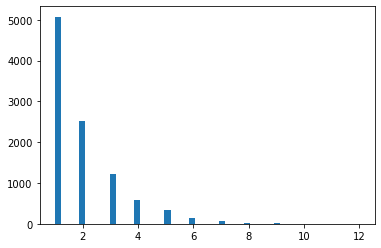

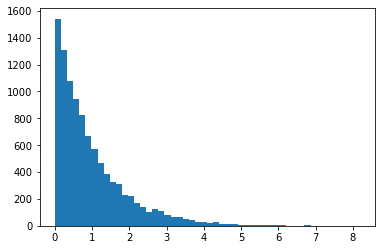

In [126]:
from scipy.stats import geom, expon
geom_distrib=geom(0.5).rvs(10000, random_state=42)
expon_distrib=expon(scale=1).rvs(10000, random_state=42)
plt.hist(geom_distrib, bins=50)
plt.show()
plt.hist(expon_distrib, bins=50)
plt.show()

## END